#Dataset Description

\
# Upload Dataset : https://www.kaggle.com/datasets/magdamonteiro/smart-cities-index-datasets

## The dataset contains information about Used Cars Price with the following columns:

`Id`: Column identifier

`City`: List of countries where smart cities across the world are located.

`Country`: The location in which the car is being sold or is available for purchase.

`Smart_Mobility`: Index calculated from assessment of city-wide Public Transportation System, ICT, accessibility infrastructure..

`Smart_Environment`: Index calculated from environmental sustainability impact, monitoring pollution and energy management.

`Smart_Government`: Index calculated from comparative study of transparent governance & open data initiatives of smart cities across the

`Smart_Economy`: Index calculated through global comparison of city-wide productivity, economic vitality, and support for

`Smart_People`: Index calculated by comparing social and cultural plurality, education systems and its supporting ancillary.

`Smart_Living`: Index calculated by measuring metric around healthcare services, social security and housing quality.

`SmartCity_Index`: Aggregate score for smart city model based on smart city supergroups.


#Tasks

## 1 . Data Cleaning

### Read the dataset

In [70]:
import pandas as pd
import numpy as np

In [71]:
df=pd.read_csv("C:\Smart_City_index_headers.csv")

### Handling Missing Values

### Correct any inconsistent data entries.

In [73]:
check_null = df.isnull().any(axis=1)
null = df[check_null]
print(null)




Empty DataFrame
Columns: [Id, City, Country, Smart_Mobility , Smart_Environment, Smart_Government , Smart_Economy , Smart_People, Smart_Living, SmartCity_Index, SmartCity_Index_relative_Edmonton]
Index: []


In [116]:
import numpy as np

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]



In [ ]:
df=remove_outliers(df,'')


### Ensure data types are appropriate for each column.

---

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Id                                 102 non-null    int64 
 1   City                               102 non-null    object
 2   Country                            102 non-null    object
 3   Smart_Mobility                     102 non-null    int64 
 4   Smart_Environment                  102 non-null    int64 
 5   Smart_Government                   102 non-null    int64 
 6   Smart_Economy                      102 non-null    int64 
 7   Smart_People                       102 non-null    int64 
 8   Smart_Living                       102 non-null    int64 
 9   SmartCity_Index                    102 non-null    int64 
 10  SmartCity_Index_relative_Edmonton  102 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 8.9+ KB


In [90]:
# Check for duplicates (1 line)
print(df.duplicated())

# Drop duplicates if any (1 line)

#df.drop_duplicates(inplace = True)

0      False
1      False
2      False
3      False
4      False
       ...  
97     False
98     False
99     False
100    False
101    False
Length: 102, dtype: bool


## 2. Exploratory Data Analysis (EDA)

<AxesSubplot:ylabel='Id'>

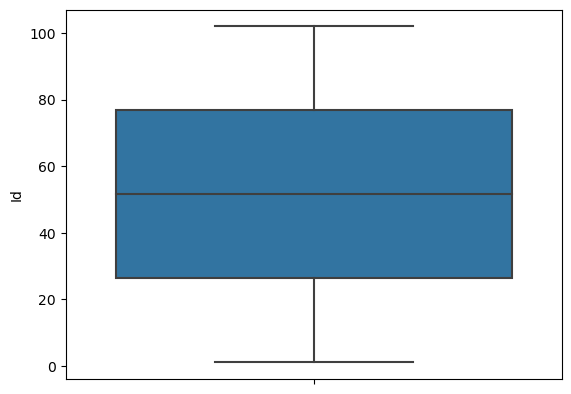

In [75]:
import seaborn  as sns
import numpy as np

sns.boxplot(y=df['Id'])



<AxesSubplot:ylabel='Smart_Environment'>

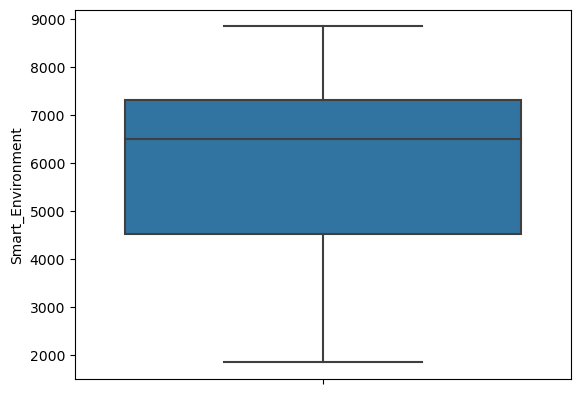

In [76]:
sns.boxplot(y=df["Smart_Environment"])

### Perform summary statistics on the dataset.

In [77]:
df.describe()

,Id,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,51.500000,5759.401961,5943.500000,5893.803922,6131.803922,5874.049020,6377.039216,5991.911765,-480.392157
std,29.588849,1214.030137,1724.032171,1153.375297,1801.555148,1449.096341,2286.397477,852.775180,852.783238
min,1.000000,3175.000000,1850.000000,2806.000000,1490.000000,2825.000000,1980.000000,4191.000000,-2281.000000
25%,26.250000,4809.750000,4530.500000,5143.000000,5007.500000,4724.750000,4385.000000,5366.250000,-1105.750000
50%,51.500000,5651.500000,6495.000000,5911.000000,6432.500000,5747.500000,6485.000000,6261.500000,-210.500000
75%,76.750000,6763.750000,7310.000000,6581.500000,7492.500000,7061.250000,8710.000000,6672.500000,200.500000
max,102.000000,8110.000000,8844.000000,8726.000000,9225.000000,9695.000000,10000.000000,7353.000000,880.000000


In [78]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Type_Country'] = label_encoder.fit_transform(df['Country'])

df.head(10)

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton,Type_Country
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666,22
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823,22
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,839,20
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,698,6
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,340,30
5,6,Montreal,Canada,7490,4848,6624,6180,8465,9920,7353,880,3
6,7,Vienna,Austria,5683,7608,6232,5415,8580,7500,6771,298,1
7,8,Odense,Denmark,6160,8404,7578,5200,6955,7200,6886,414,6
8,9,Singapore,Singapore,5790,4344,5560,5535,9695,10000,6813,341,25
9,10,Boston,United States,7870,5224,6020,8935,6573,6220,6852,380,35


In [108]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Type_City'] = label_encoder.fit_transform(df['City'])

df.head(10)

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton,Type_Country,Type_City
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666,22,65
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823,22,11
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,839,20,4
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,698,6,24
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,340,30,82
5,6,Montreal,Canada,7490,4848,6624,6180,8465,9920,7353,880,3,56
6,7,Vienna,Austria,5683,7608,6232,5415,8580,7500,6771,298,1,98
7,8,Odense,Denmark,6160,8404,7578,5200,6955,7200,6886,414,6,63
8,9,Singapore,Singapore,5790,4344,5560,5535,9695,10000,6813,341,25,79
9,10,Boston,United States,7870,5224,6020,8935,6573,6220,6852,380,35,16


### Identify and analyze patterns in the data.

### Visualize the distribution of key variables.

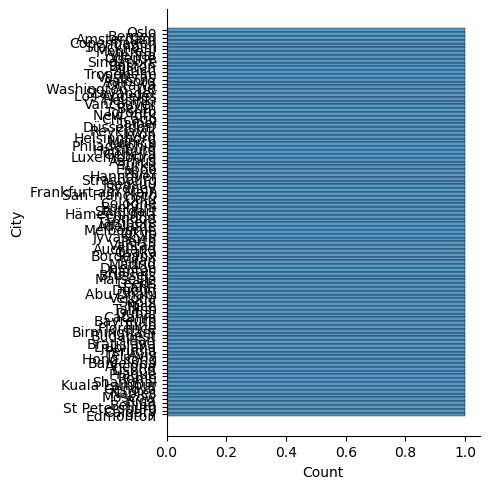

In [79]:
sns.displot(df, y="City")

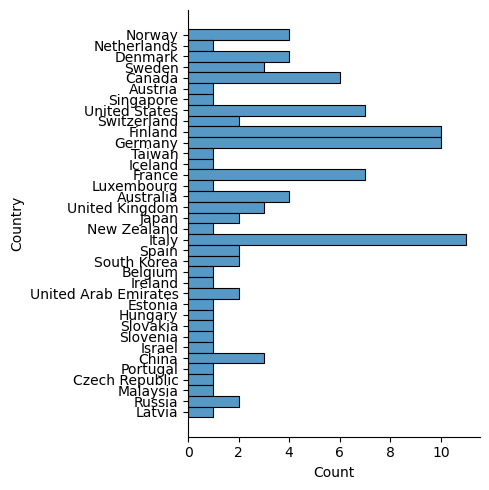

In [80]:
sns.displot(df, y="Country")

### Explore relationships between variables.


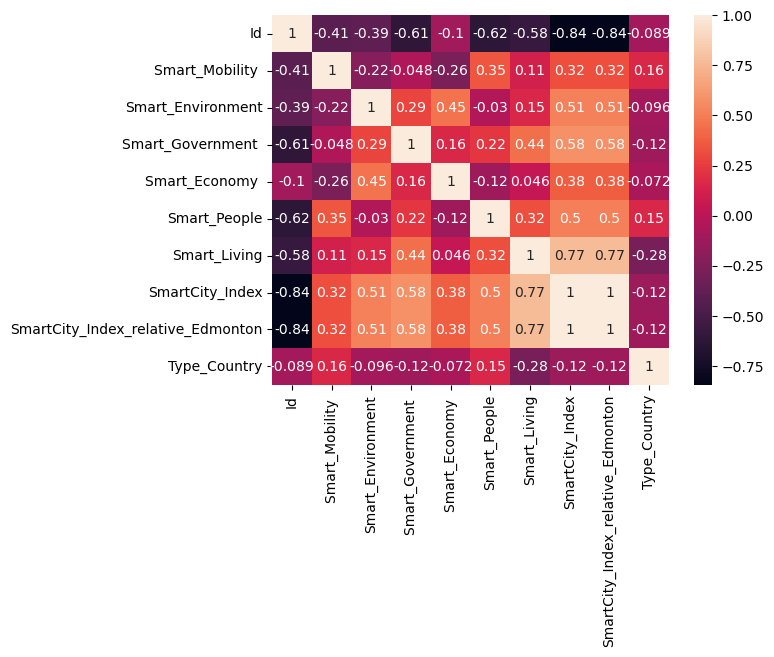

In [103]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt



corr_matrix = df.corr()

sn.heatmap(corr_matrix, annot=True)
plt.show()

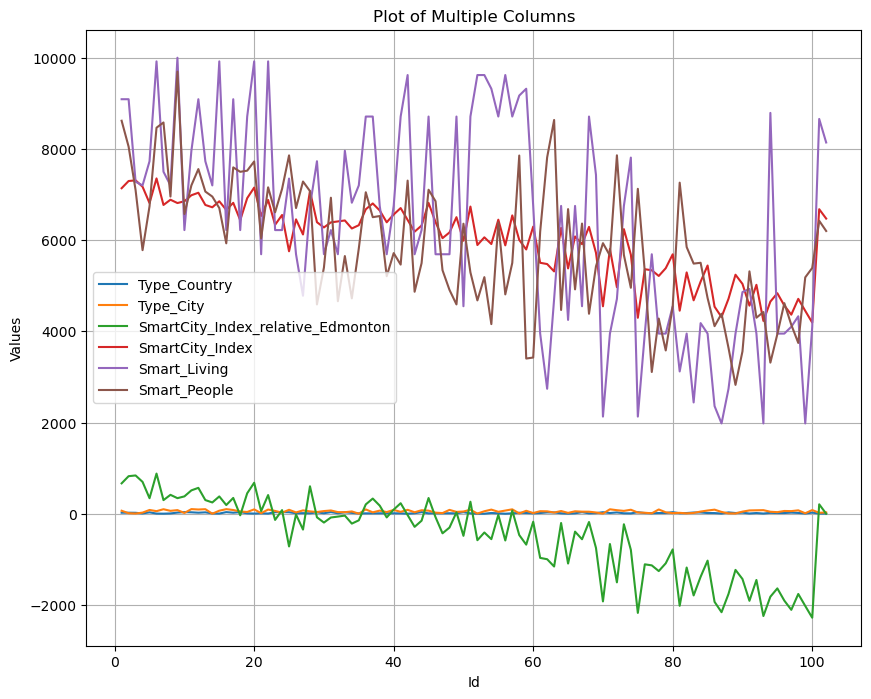

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(df['Id'], df['Type_Country'], label='Type_Country')
plt.plot(df['Id'], df['Type_City'], label='Type_City')
plt.plot(df['Id'], df['SmartCity_Index_relative_Edmonton'], label='SmartCity_Index_relative_Edmonton')
plt.plot(df['Id'], df['SmartCity_Index'], label='SmartCity_Index')
plt.plot(df['Id'], df['Smart_Living'], label='Smart_Living')
plt.plot(df['Id'], df['Smart_People'], label='Smart_People')

plt.xlabel('Id')
plt.ylabel('Values')
plt.title('Plot of Multiple Columns')
plt.legend()
plt.grid()
plt.show()